# Dimensionality Reduction for Data Visualization: PCA vs TSNE vs UMAP vs LDA

- https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29

In [35]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
kaggle.json


- F:\Document\Seminar\Kaggle\key


### Data set
- The Sign-Language-MNIST : 수화 이미지
- 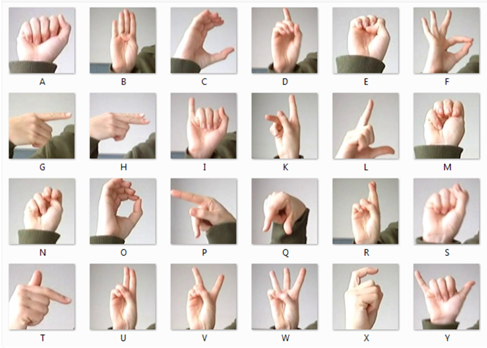

- https://www.kaggle.com/datamunge/sign-language-mnist

In [36]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [38]:
!pip install umap


In [39]:
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
train = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [40]:
train['label'].describe()

count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64

In [41]:
import numpy as np
np.unique(train['label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

- Pixel Range를 알아보기 위해 원본 Train 데이터로 부터 참고해 보자
  

In [42]:
supervised_train_data = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')

In [43]:
supervised_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


- 처음 10개의 Label에 대해서만 우선 테스트해 봅시다

In [44]:
#picking only the first 10 labels
train = train[train['label'] < 10]
# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

- Plotting Functions

In [60]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    #fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=600)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [46]:
def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    #fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=900,height=500)
    fig.layout.template = 'plotly_dark'
    
    fig.show()


- Standardizing the data

In [47]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
x = StandardScaler().fit_transform(x)

## Implementing PCA

In [48]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


Duration: 0.31159138679504395 seconds


In [61]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [50]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

## Implementing t-SNE
- t-SNE는 데이터 차원을 축소하는데 사용되는 기법입니다.
- 특히, 고차원의 데이터를 시각화 하는데 아주 유용하게 사용되는 방법
- t-SNE 알고리즘은 많은 계산이 요구되기 때문에, 1차적으로 차원을 축소한 후에 t-SNE 알고리즘에 데이터를 입력해야 하는 경우가 많음
- 또한, t-SNE 알고리즘은 N개의 데이터가 있을때 N^2 만큼 시간이 오래걸리기 때문에 실제 데이터를 분석하는데 있어서 제한적일 수 있습니다.

In [51]:
start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 37.55274772644043 seconds


In [62]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [53]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

## Implementing UMAP

- n_neighbors : local & globla structure 조율, 작을 수록 local structure 중점
- min_dist :  포인트를 얼마나 타이트하게 묶을 것인지 , 작을수록 근접하게 클러스터링
- n_componets : reduced dimension을 결정
- metric : 거리 계산을 어떤 방식으로 계산할 것인지

In [54]:
import umap.umap_ as umap

start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 17.226442337036133 seconds


In [63]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [56]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

## IMPLEMENTING LDA

- UMAP 및 t-SNE를 사용하여 LDA를 사용하는 클러스터의 백본을 간신히 볼 수 있다면 동일한 클러스터 영역에서 응집 된 전체 데이터 포인트 클러스터를 볼 수 있습니다.


In [57]:

start = time.time()
X_LDA = LDA(n_components=3).fit_transform(x,y)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.2742908000946045 seconds


In [64]:
plot_2d(X_LDA[:, 0],X_LDA[:, 1])

In [59]:
plot_3d(X_LDA[:, 0],X_LDA[:, 1],X_LDA[:, 2])

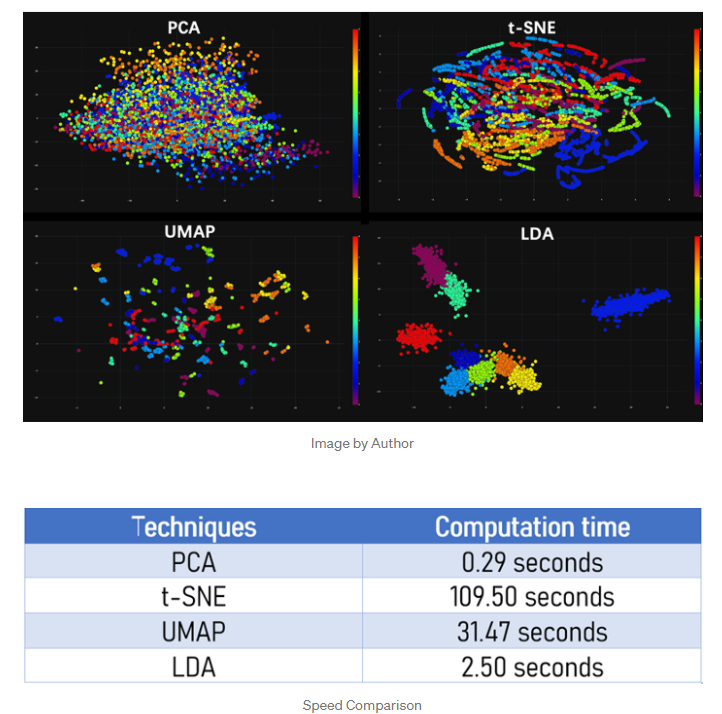